# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold


# Loading Datasets

In [2]:
!ls

 cs-test.csv	        GiveMeSomeCredit.ipynb	 submissions.csv
 cs-training.csv        GiveMeSomeCredit.zip
'Data Dictionary.xls'   sampleEntry.csv


In [3]:
df_train = pd.read_csv('cs-training.csv')
df_test = pd.read_csv('cs-test.csv')

# Data exploration

In [4]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB
None


In [5]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(5), int64(7)
memory usage: 9.3 MB
None


The training Dataset has 150 000 examples while the testing Dataset has 101503 examples.
In both datasets ( training and testing), the same 2 columns have missing values:
- MonthlyIncome
- NumberOfDependents

In [6]:
print('Number of missing "MonthlyIncome" in the training Dataset is:', df_train.MonthlyIncome.isnull().sum())
print('Number of missing "MonthlyIncome" in the testing Dataset is:', df_test.MonthlyIncome.isnull().sum())

Number of missing "MonthlyIncome" in the training Dataset is: 29731
Number of missing "MonthlyIncome" in the testing Dataset is: 20103


In [7]:
print('Number of missing "NumberOfDependents" in the training Dataset is:', df_train.NumberOfDependents.isnull().sum())
print('Number of missing "NumberOfDependents" in the testing Dataset is:', df_test.NumberOfDependents.isnull().sum())

Number of missing "NumberOfDependents" in the training Dataset is: 3924
Number of missing "NumberOfDependents" in the testing Dataset is: 2626


In [8]:
df_train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [9]:
df_test.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101503.000000,0.0,101503.000000,101503.000000,101503.000000,101503.000000,8.140000e+04,101503.000000,101503.000000,101503.000000,101503.000000,98877.000000
mean,50752.000000,NaN,5.310000,52.405436,0.453770,344.475020,6.855036e+03,8.453514,0.296691,1.013074,0.270317,0.769046
std,29301.536524,NaN,196.156039,14.779756,4.538487,1632.595231,3.650860e+04,5.144100,4.515859,1.110253,4.503578,1.136778
min,1.000000,NaN,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25376.500000,NaN,0.030131,41.000000,0.000000,0.173423,3.408000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,50752.000000,NaN,0.152586,52.000000,0.000000,0.364260,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,76127.500000,NaN,0.564225,63.000000,0.000000,0.851619,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,101503.000000,NaN,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


<font size="4">
    The minimum age in the training Dataset is 0 while in the Testing Dataset the minimum age is 21 which is logical. <br>
    Lets check the number of example with age lesser than 21
</font>

In [10]:
df_train[df_train.age < 21].shape

(1, 12)

In [11]:
df_train[df_train.age < 21]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


<font size="4">
    There is only one row with missing age. We can simply get rid of it.
</font>

In [12]:
df_train = df_train.drop(df_train.loc[df_train.age == 0].index, axis=0)

We note that `RevolvingUtilisationOfUnsecuredLines` and `DebtRatio` which are percentages have some very high values. These values are most likely wrong. <br> 
    Lets first look on high values of "DebtRatio":<br>
    Since $$ DebtRatio = \frac{MonthlySpending}{MonthlyIncome} $$ <br>
    We will check if incoherent values of `DebtRatio` are related to missing values in `MonthlyIncome`


In [13]:
print(df_train['DebtRatio'][df_train.MonthlyIncome.isna()].describe())
print(df_train['DebtRatio'][df_train.MonthlyIncome.notna()].describe())

count     29731.000000
mean       1673.396556
std        4248.372895
min           0.000000
25%         123.000000
50%        1159.000000
75%        2382.000000
max      329664.000000
Name: DebtRatio, dtype: float64
count    120268.000000
mean         26.598995
std         424.448215
min           0.000000
25%           0.143388
50%           0.296021
75%           0.482560
max       61106.500000
Name: DebtRatio, dtype: float64


It's clear that high values of `DebtRation` are related to missing values of `MonthlyIncome`. But there are still some high values when `MonthlyIncome` is not null. <br>
    Lets check when `MonthlyIncome` is zero

In [14]:
print(df_train['DebtRatio'][df_train.MonthlyIncome == 0].describe())
print(df_train['DebtRatio'][df_train.MonthlyIncome > 0].describe())

count     1634.000000
mean      1573.567319
std       2818.015889
min          0.000000
25%         96.000000
50%        930.000000
75%       2185.250000
max      60212.000000
Name: DebtRatio, dtype: float64
count    118634.000000
mean          5.291897
std         199.775067
min           0.000000
25%           0.141495
50%           0.292440
75%           0.473291
max       61106.500000
Name: DebtRatio, dtype: float64


High values of `DebtRatio` are also related to zero `MonthlyIncome`

In [15]:
print(df_test['DebtRatio'][df_test.MonthlyIncome.isna()].describe())
print(df_test['DebtRatio'][df_test.MonthlyIncome.notna()].describe())

count     20103.000000
mean       1622.574143
std        2832.472770
min           0.000000
25%         120.000000
50%        1146.000000
75%        2379.500000
max      268326.000000
Name: DebtRatio, dtype: float64
count     81400.000000
mean         28.828501
std         916.109297
min           0.000000
25%           0.141927
50%           0.294997
75%           0.481263
max      202990.000000
Name: DebtRatio, dtype: float64


In [16]:
print(df_test['DebtRatio'][df_test.MonthlyIncome == 0].describe())
print(df_test['DebtRatio'][df_test.MonthlyIncome > 0].describe())

count      1020.000000
mean       1938.636275
std        7919.688225
min           0.000000
25%          86.250000
50%         744.000000
75%        2148.500000
max      202990.000000
Name: DebtRatio, dtype: float64
count    80380.000000
mean         4.593568
std         88.807222
min          0.000000
25%          0.140400
50%          0.291612
75%          0.471936
max       8996.500000
Name: DebtRatio, dtype: float64


The same observations hold for the testing dataset. <br>
Our Strategy will consists of filling missing values in `MonthlyIncome` then readjust `DebtRatio` accordingly.
<br>
<br>
For this purpose, we will join both datasets and fill missing values in `MonthlyIncome` by the median `MonthlyIncome` value of persons of the same age range.


In [17]:
df_all = pd.concat([df_train,df_test], sort = False).reset_index(drop=True)
df_all.loc[149999:]

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
149999,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
150000,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
150001,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
150002,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
150003,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
251497,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
251498,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
251499,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
251500,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [18]:
df_all[df_all.MonthlyIncome.notna() & (df_all.MonthlyIncome !=0)].describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,199014.000000,118634.000000,199014.000000,199014.000000,199014.000000,199014.000000,1.990140e+05,199014.000000,199014.000000,199014.000000,199014.000000,199014.000000
mean,65217.301044,0.069887,5.616145,51.355960,0.384722,5.009848,6.834769e+03,8.778066,0.214347,1.057674,0.189640,0.858935
std,40082.656490,0.254958,233.428861,14.377428,3.521616,164.244146,2.587671e+04,5.162725,3.487202,1.144458,3.470125,1.157003
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31436.000000,0.000000,0.035497,41.000000,0.000000,0.141111,3.500000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,62869.000000,0.000000,0.178219,51.000000,0.000000,0.292139,5.442000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,94322.500000,0.000000,0.582235,62.000000,0.000000,0.472765,8.300000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,150000.000000,1.000000,50708.000000,103.000000,98.000000,61106.500000,7.727000e+06,63.000000,98.000000,54.000000,98.000000,43.000000


In [19]:
#median_income_by_age = df_all[df_all.MonthlyIncome.notna() & (df_all.MonthlyIncome >10)].groupby('age').median()['MonthlyIncome']

#count_person_by_age = df_all[df_all.MonthlyIncome.notna() & (df_all.MonthlyIncome >10)].groupby('age').count()['MonthlyIncome']

median_income_by_age = df_all[df_all.MonthlyIncome.notna() & (df_all.MonthlyIncome !=0)].groupby('age').median()['MonthlyIncome']

count_person_by_age = df_all[df_all.MonthlyIncome.notna() & (df_all.MonthlyIncome !=0)].groupby('age').count()['MonthlyIncome']

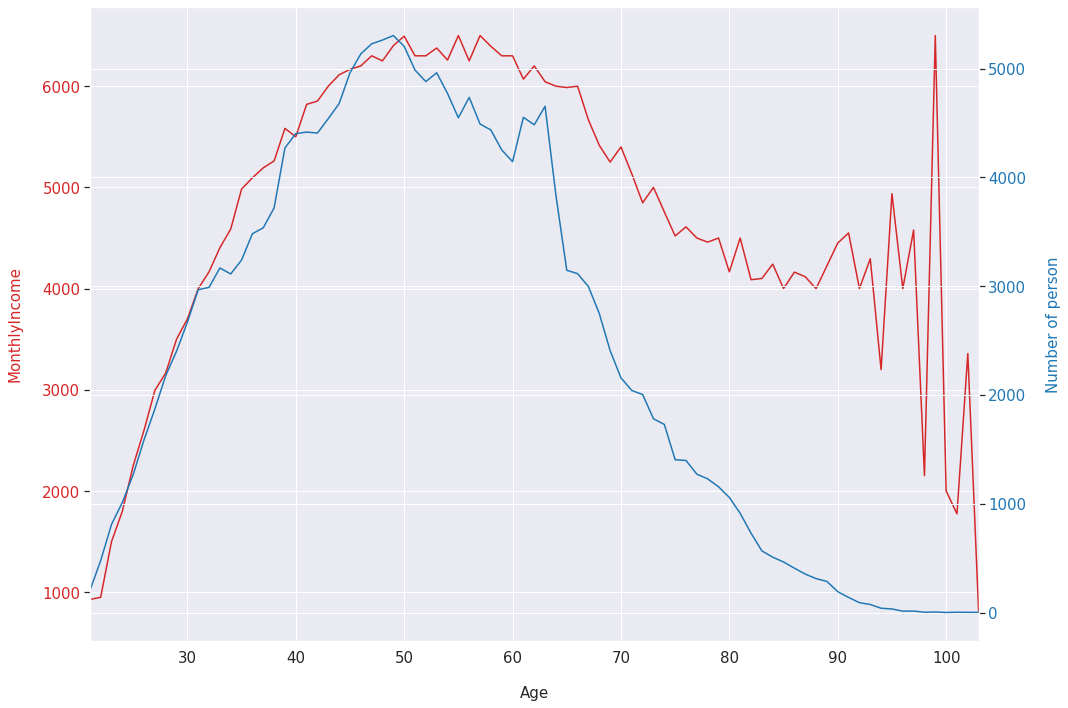

In [20]:
def plot_median_age(median, count):
    f, ax = plt.subplots(figsize=(15, 10))

    color = 'tab:red'
    ax.plot(list(median.index),median.values,  color=color, label='Median Income')
    ax.set_xlabel('Age', size=15, labelpad=20)
    ax.set_ylabel('MonthlyIncome',color=color, size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelcolor=color, labelsize=15)
    ax.set_xlim([median.index.min(), median.index.max()])
#    ax.set_ylim([0, median.max()])

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Number of person', color=color, size=15, labelpad=20)  # we already handled the x-label with ax1
    ax2.plot(count, color=color, label='Number of person')
    ax2.tick_params(axis='y', labelcolor=color, labelsize=15)
    f.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

plot_median_age(median_income_by_age, count_person_by_age)

To remove large fluctuation for greater age, we can make a convolution.

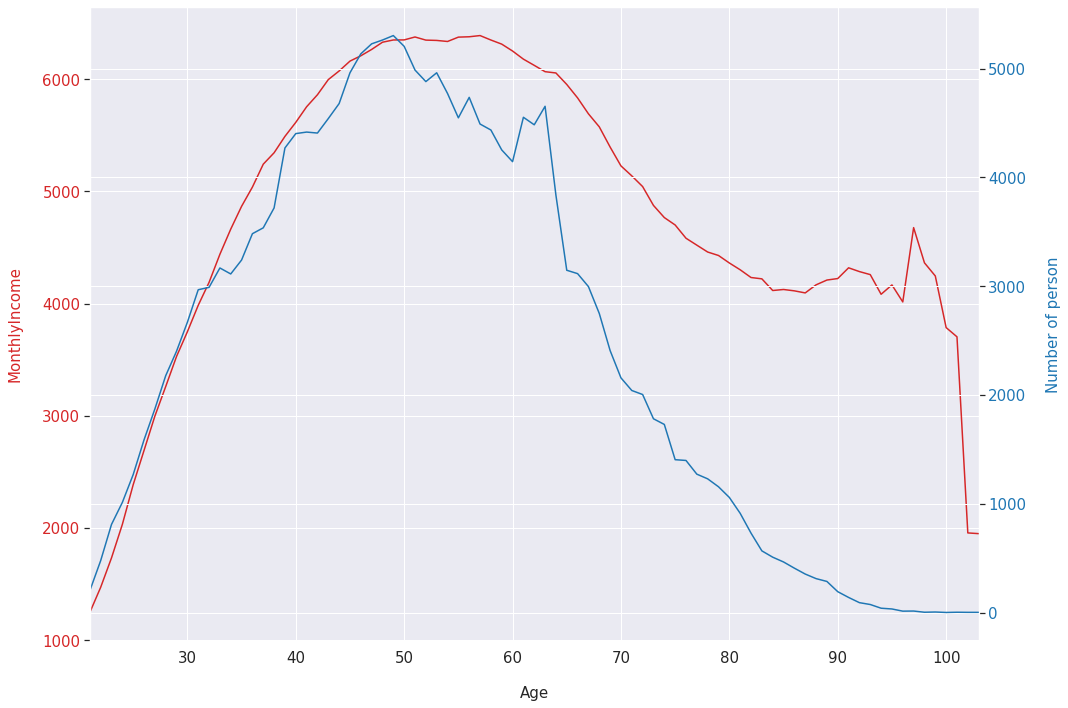

In [21]:
def convolve(median,count, N=5):
    res = pd.Series(np.convolve(median*count,np.ones(N), mode="same")/np.convolve(count,np.ones(N), mode='same'), index=median_income_by_age.index)
    return res

conv_median = convolve(median_income_by_age,count_person_by_age)
plot_median_age(conv_median,count_person_by_age)

Next, Missing values of `MonthlyIncome` are filled with calculated median values.
The `DebtRatio` are also adjusted using the new `MonthlyIncome` with the following formula:
$$ DebtRatio = \frac{DebtRatio}{MonthlyIncome+1}$$

In [22]:
#df_all.loc[df_all.MonthlyIncome.isna()|(df_all.MonthlyIncome<=10), 'DebtRatio'] = df_all[['age','DebtRatio','MonthlyIncome']][df_all.MonthlyIncome.isna()|(df_all.MonthlyIncome<=10)].apply(lambda x : x.iloc[1]/(conv_median.loc[min(x.iloc[0],103)]+1.), axis=1 )
#df_all.loc[df_all.MonthlyIncome.isna()|(df_all.MonthlyIncome<=10), 'MonthlyIncome'] = df_all['age'][df_all.MonthlyIncome.isna()|(df_all.MonthlyIncome<=10)].apply(lambda x: conv_median.loc[min(103,x)])

df_all.loc[df_all.MonthlyIncome.isna(), 'DebtRatio'] = df_all[['age','DebtRatio','MonthlyIncome']][df_all.MonthlyIncome.isna()].apply(lambda x : x.iloc[1]/(conv_median.loc[min(x.iloc[0],103)]+1.), axis=1 )
df_all.loc[df_all.MonthlyIncome.isna(), 'MonthlyIncome'] = df_all['age'][df_all.MonthlyIncome.isna()].apply(lambda x: conv_median.loc[min(103,x)])

In [23]:
median_NumOfDep_by_age = df_all[df_all.NumberOfDependents.notna()].groupby('age').median()['NumberOfDependents']

count_person_by_age = df_all[df_all.NumberOfDependents.notna()].groupby('age').count()['NumberOfDependents']

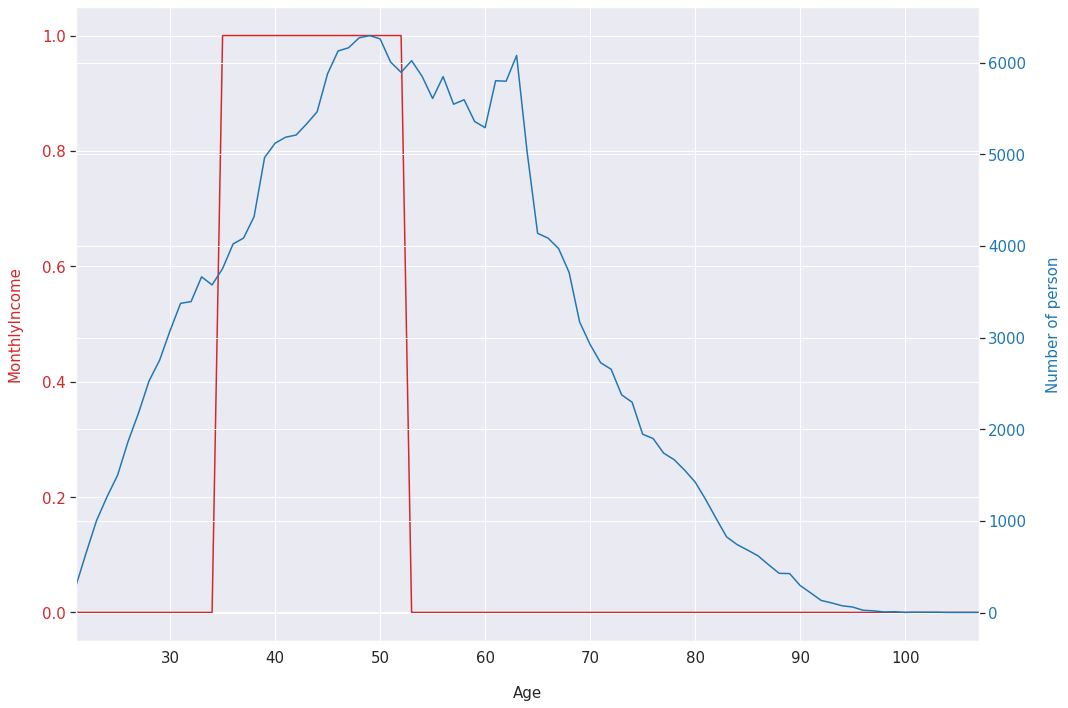

In [24]:
plot_median_age(median_NumOfDep_by_age, count_person_by_age)

In [25]:
df_all.loc[df_all.NumberOfDependents.isna(), 'NumberOfDependents'] = df_all['age'][df_all.NumberOfDependents.isna()].apply(lambda x: median_NumOfDep_by_age.loc[x] if x in median_NumOfDep_by_age.index else 0)

In [26]:
df_train = df_all[df_all.SeriousDlqin2yrs.notna()]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149998
Data columns (total 12 columns):
Unnamed: 0                              149999 non-null int64
SeriousDlqin2yrs                        149999 non-null float64
RevolvingUtilizationOfUnsecuredLines    149999 non-null float64
age                                     149999 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149999 non-null int64
DebtRatio                               149999 non-null float64
MonthlyIncome                           149999 non-null float64
NumberOfOpenCreditLinesAndLoans         149999 non-null int64
NumberOfTimes90DaysLate                 149999 non-null int64
NumberRealEstateLoansOrLines            149999 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149999 non-null int64
NumberOfDependents                      149999 non-null float64
dtypes: float64(5), int64(7)
memory usage: 14.9 MB


In [27]:
df_test = df_all[df_all.SeriousDlqin2yrs.isna()]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101503 entries, 149999 to 251501
Data columns (total 12 columns):
Unnamed: 0                              101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           101503 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      101503 non-null float64
dtypes: float64(5), int64(7)
memory usage: 10.1 MB


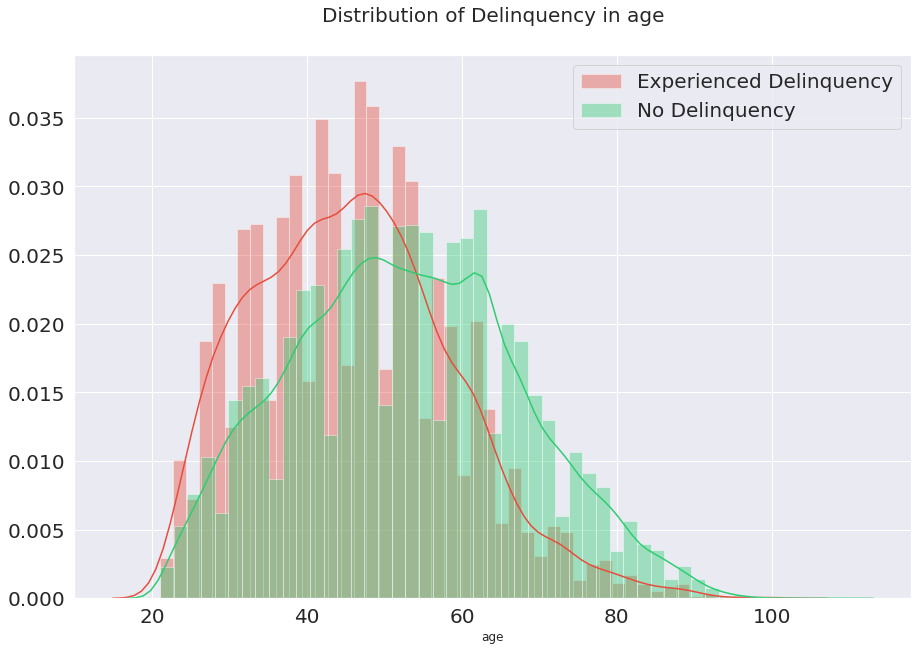

In [28]:
delinquency = df_train['SeriousDlqin2yrs'] == 1
def Delinq_dist(feature):
    fig, ax = plt.subplots(figsize =(15, 10))
    sns.distplot(df_train[delinquency][feature], label='Experienced Delinquency', hist=True, color='#e74c3c', ax=ax)
    sns.distplot(df_train[~delinquency][feature], label='No Delinquency', hist=True, color='#2ecc71', ax=ax)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

    ax.legend(loc='upper right', prop={'size': 20})
    ax.set_title('Distribution of Delinquency in {}'.format(feature), size=20, y=1.05)
    plt.show()

#features = ['age',
#       'NumberOfTime30-59DaysPastDueNotWorse',
#       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
#       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
#       'NumberOfDependents']
    
#for feature in features:
Delinq_dist('age')


# Model
We will try two models: Random forest and Gradient Boosted Decision Tree. <br>
In both model we will use a five-fold cross validation.<br>
And for Evaluation we will use the same metric as in the competition: AUC

In [29]:
X_train = df_train.drop(columns=['Unnamed: 0', 'SeriousDlqin2yrs'])
Y_train = df_train['SeriousDlqin2yrs']
X_test = df_test.drop(columns=['Unnamed: 0', 'SeriousDlqin2yrs'])

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(Y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (149999, 10)
y_train shape: (149999,)
X_test shape: (101503, 10)


## 1. Random Forest

In [30]:
SEED = 12
model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=100,
                                           max_depth=10,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=SEED,
                                           n_jobs=-1,
                                           verbose=1)

In [31]:
N = 5
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=X_train.columns)
fprs, tprs, scores = [], [], []

Folds = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)


for fold, (trn_idx, val_idx) in enumerate(Folds.split(X_train, Y_train), 1):
    print('Fold {}\n'.format(fold))
    
    # Fitting the model
    model.fit(X_train.iloc[trn_idx], Y_train.iloc[trn_idx])
    
    # Computing Train AUC score
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(Y_train.iloc[trn_idx], model.predict_proba(X_train.iloc[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # Computing Validation AUC score
    val_fpr, val_tpr, val_thresholds = roc_curve(Y_train.iloc[val_idx], model.predict_proba(X_train.iloc[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    # X_test probabilities
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = model.predict_proba(X_test)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = model.predict_proba(X_test)[:, 1]
    importances.iloc[:, fold - 1] = model.feature_importances_
        
    oob += model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, model.oob_score_))   
    
print('Average OOB Score: {}'.format(oob))

Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_

Fold 1 OOB Score: 0.9368494737456146

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_

Fold 2 OOB Score: 0.9372911440928674

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_

Fold 3 OOB Score: 0.9367494729122743

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_

Fold 4 OOB Score: 0.9371744764539705

Fold 5



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_

Fold 5 OOB Score: 0.9366583333333334

Average OOB Score: 0.936944580107612


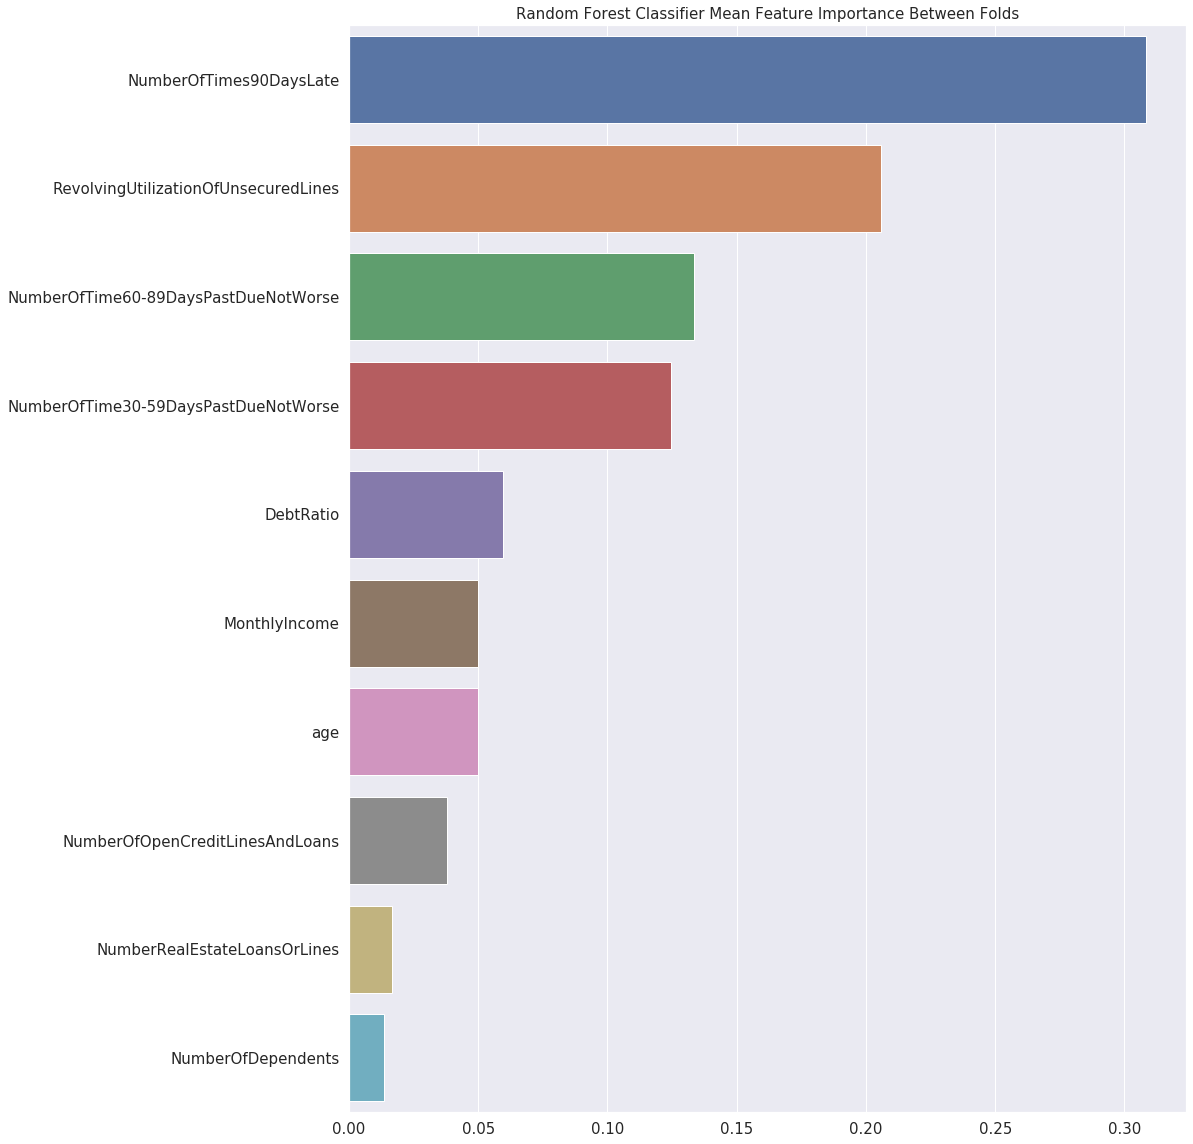

In [32]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 20))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

plt.show()



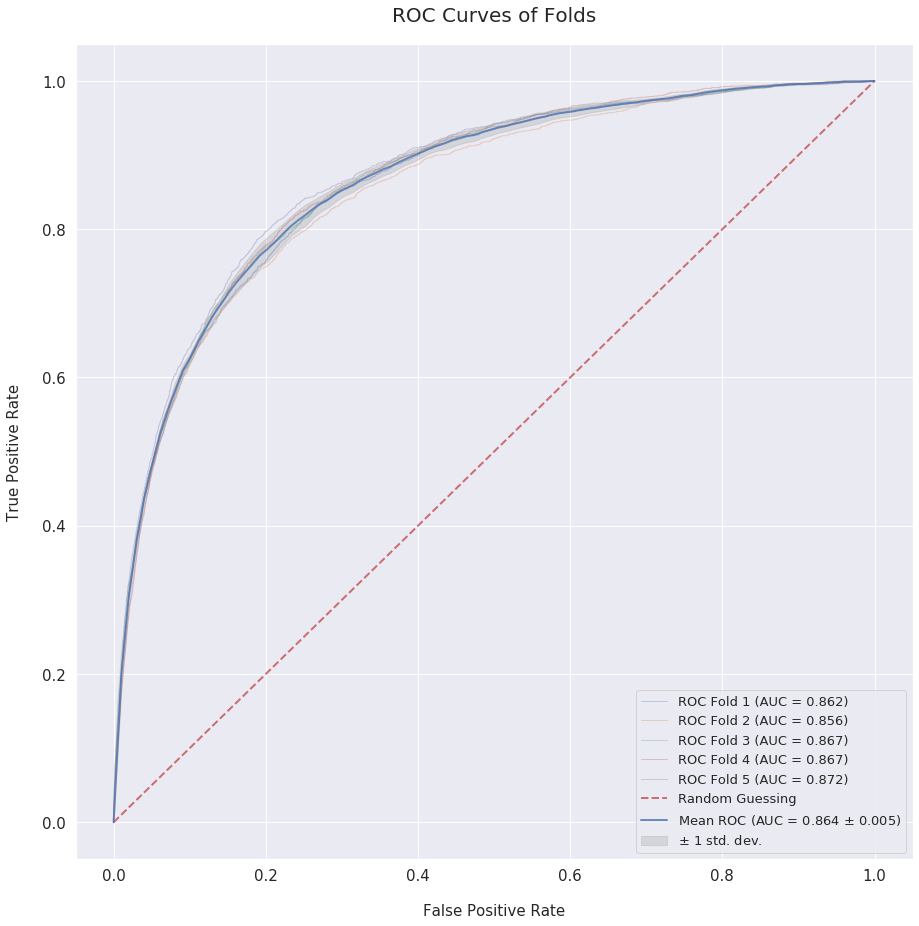

In [33]:
def plot_roc_curve(fprs, tprs):
    
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(15, 15))
    
    # Plotting ROC for each fold and computing AUC scores
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
        
    # Plotting ROC for random guessing
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random Guessing')
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    # Plotting the mean ROC
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)
    
    # Plotting the standard deviation around the mean ROC Curve
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20, y=1.02)
    ax.legend(loc='lower right', prop={'size': 13})
    
    plt.show()

plot_roc_curve(fprs, tprs)

In [34]:
class_delinquency = [col for col in probs.columns if col.endswith('Prob_1')]
probs['1'] = probs[class_delinquency].sum(axis=1) / N
probs['0'] = probs.drop(columns=class_delinquency).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['1']#.astype(int)

submission_df = pd.DataFrame(columns=['Id', 'Probability'])
submission_df['Id'] = df_test['Unnamed: 0']
submission_df['Probability'] = y_pred.values
submission_df.to_csv('submissions_RF.csv', header=True, index=False)
submission_df.head(10)

,Id,Probability
149999,1,0.075657
150000,2,0.040085
150001,3,0.018463
150002,4,0.066912
150003,5,0.115676
150004,6,0.028070
150005,7,0.061685
150006,8,0.041518
150007,9,0.006936
150008,10,0.371670


This file scored `0.86124` in the leaderboard

## 2. XGBOOST

In [35]:
from xgboost import XGBClassifier

In [36]:
model = XGBClassifier(n_estimators=500,
                                           max_depth=10,
                                           random_state=SEED)

In [37]:
N = 5
oob = 0
probs = pd.DataFrame(np.zeros((len(X_test), N * 2)), columns=['Fold_{}_Prob_{}'.format(i, j) for i in range(1, N + 1) for j in range(2)])
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=X_train.columns)
fprs, tprs, scores = [], [], []

Folds = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)


for fold, (trn_idx, val_idx) in enumerate(Folds.split(X_train, Y_train), 1):
    print('Fold {}\n'.format(fold))
    
    # Fitting the model
    model.fit(X_train.iloc[trn_idx], Y_train.iloc[trn_idx],eval_set=[(X_train.iloc[val_idx], Y_train.iloc[val_idx])], early_stopping_rounds=10, eval_metric="auc", verbose=True)
    
    # Computing Train AUC score
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(Y_train.iloc[trn_idx], model.predict_proba(X_train.iloc[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # Computing Validation AUC score
    val_fpr, val_tpr, val_thresholds = roc_curve(Y_train.iloc[val_idx], model.predict_proba(X_train.iloc[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)  
      
    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    # X_test probabilities
    probs.loc[:, 'Fold_{}_Prob_0'.format(fold)] = model.predict_proba(X_test)[:, 0]
    probs.loc[:, 'Fold_{}_Prob_1'.format(fold)] = model.predict_proba(X_test)[:, 1]
    importances.iloc[:, fold - 1] = model.feature_importances_
        
    #oob += model.oob_score_ / N
    #print('Fold {} OOB Score: {}\n'.format(fold, model.oob_score_))   
    
#print('Average OOB Score: {}'.format(oob))

Fold 1

[0]	validation_0-auc:0.849024
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.851664
[2]	validation_0-auc:0.854644
[3]	validation_0-auc:0.856146
[4]	validation_0-auc:0.85623
[5]	validation_0-auc:0.855992
[6]	validation_0-auc:0.856894
[7]	validation_0-auc:0.857211
[8]	validation_0-auc:0.85752
[9]	validation_0-auc:0.857836
[10]	validation_0-auc:0.857885
[11]	validation_0-auc:0.857777
[12]	validation_0-auc:0.858403
[13]	validation_0-auc:0.858693
[14]	validation_0-auc:0.858884
[15]	validation_0-auc:0.858913
[16]	validation_0-auc:0.859092
[17]	validation_0-auc:0.859007
[18]	validation_0-auc:0.858922
[19]	validation_0-auc:0.859138
[20]	validation_0-auc:0.859269
[21]	validation_0-auc:0.85947
[22]	validation_0-auc:0.859649
[23]	validation_0-auc:0.859575
[24]	validation_0-auc:0.859572
[25]	validation_0-auc:0.859521
[26]	validation_0-auc:0.859597
[27]	validation_0-auc:0.859531
[28]	validation_0-auc:0.859391
[29]	validation_0-auc:0.859273
[30]	valida

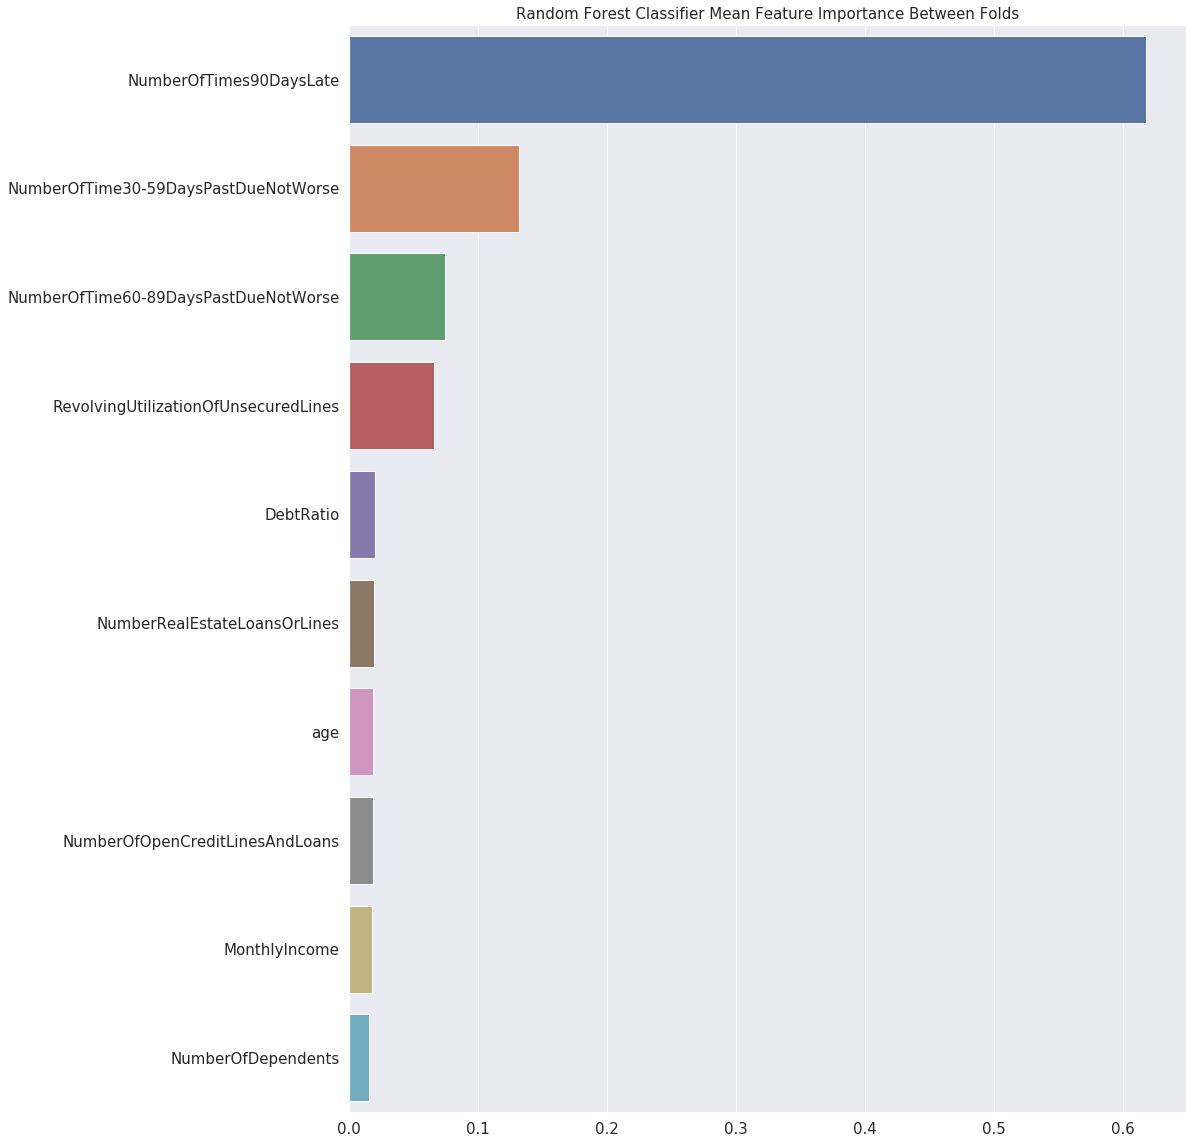

In [38]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 20))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

plt.show()



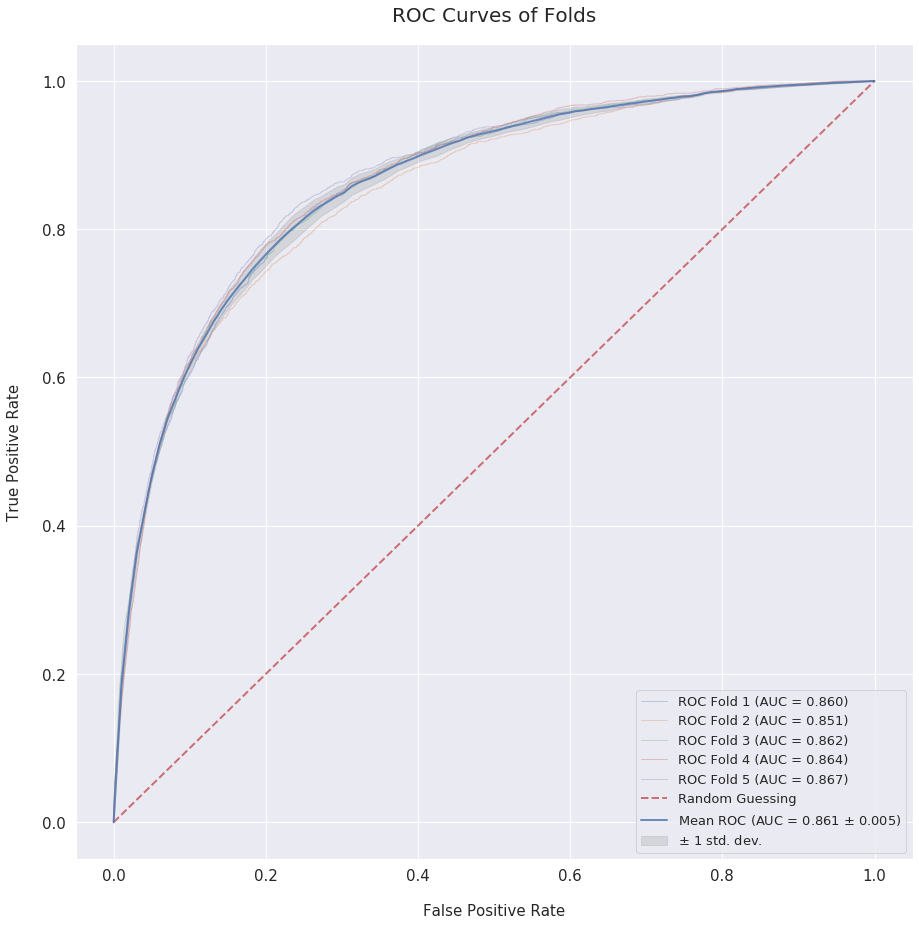

In [39]:
plot_roc_curve(fprs, tprs)

In [40]:
class_delinquency = [col for col in probs.columns if col.endswith('Prob_1')]
probs['1'] = probs[class_delinquency].sum(axis=1) / N
probs['0'] = probs.drop(columns=class_delinquency).sum(axis=1) / N
probs['pred'] = 0
pos = probs[probs['1'] >= 0.5].index
probs.loc[pos, 'pred'] = 1

y_pred = probs['1']#.astype(int)

submission_df = pd.DataFrame(columns=['Id', 'Probability'])
submission_df['Id'] = df_test['Unnamed: 0']
submission_df['Probability'] = y_pred.values
submission_df.to_csv('submissions_XGB.csv', header=True, index=False)
submission_df.head(10)

,Id,Probability
149999,1,0.102006
150000,2,0.063400
150001,3,0.049204
150002,4,0.086880
150003,5,0.172626
150004,6,0.055902
150005,7,0.121622
150006,8,0.069483
150007,9,0.038560
150008,10,0.378521


This file scored `0.85944` in the leaderboard

# Conclusion
In this Notebook the Dataset of th "GiveMeSomeCredit" Competition on Kaggle has been explored and two predictive models have been proposed.
In the Data transformation part we only dealt with missing values in two columns: `MonthlyIncome` and `NumberOfDependents`. 
Also most of the inconsistent values in `DebtRatio` have been adjusted.
The predictions gave descent scores in the competition leaderboard. However, further Data cleaning ( Dealing with inconsistent values in `RevolvingUtilizationOfUnsecuredLines` and the rest of high values in `DebtRatio`) would probably improve the quality of the prediction.